# Lektion 5: _Comparision_ und _Relational Claims_ analysieren

In der letzten Lektion haben wir gesehen, wie wir _Estimation Claims_ mit statistischen Tools prüfen können. In dieser Lektion schauen wir uns an, wie wir mit _Comparison_ und _Relational Claims_ umgehen.

Eine Warnung: Wir gehen im Folgenden (stillschweigend) davon aus, dass die Daten, die wir uns anschauen, einer Normalverteilung folgen. Entsprechend werden wir auch statistische Tools wählen, die eine Normalverteilung der Daten voraussetzen. Wie schon in der letzten Lektion erläutert, gibt es analoge Tools, um Daten zu analysieren, die _keiner_ Normalverteilung folgen; diese werden wir im Rahmen dieser Einführung aber nicht besprechen.

#### Lernziele:

In dieser Lektion lernen Sie...

- Was der p-Wert (engl. `p-value`) ist und wie Sie ihn interpretieren.
- Wie Sie den p-Wert berechnen und ihn zum Vergleich zweier Datensätze nutzen.
- Wie Sie _Relation Claims_ durch (lineare) Modellierung prüfen.

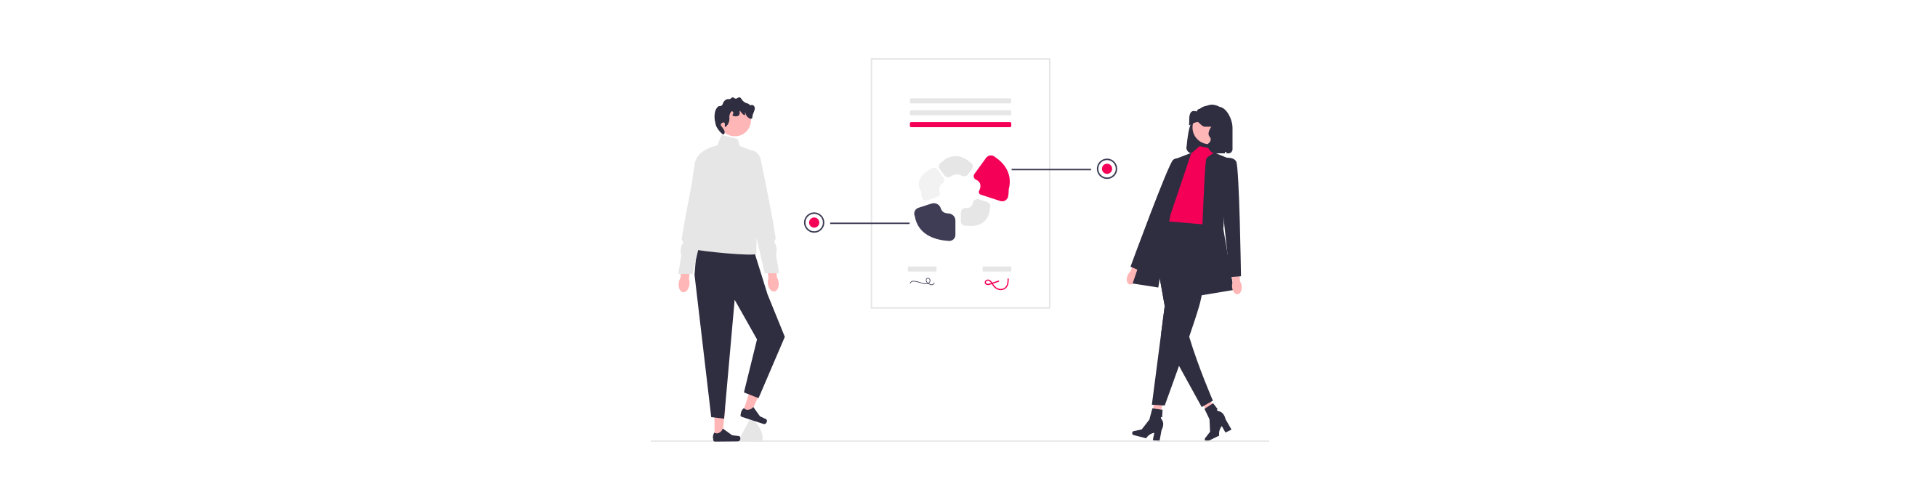

# _Comparision Claims_ prüfen

In _Comparision Claims_ vergleichen wir zwei Werte miteinander, z.B. "In Madrid ist es wärmer als in Düsseldorf." oder “Der Durchschnitt der Antworten auf Frage A wird geringer sein, als der Durchschnitt der Antworten auf Frage B.” Wie werten wir diese Aussagen aus?


## Beispiel: Vergleichende Mensastudie 🍱

Betrachten wir dazu abermals die (fiktive) Mensastudie aus der letzten Lektion. Zusätzlich zu den Daten aus der letzten Lektion (`Mensa1`) schauen wir uns nun noch Daten einer analogen Studie zu einer zweiten Mensa an (`Mensa2`).

In beiden Studien wurden jeweils 50 zufällig ausgewählten Studierenden gebeten, die folgenden zwei Fragen zu beantworten:
1. Waren Sie heute schon in der Mensa oder haben es fest vor? `Ja/Nein`
2. Wie zufrieden sind Sie mit der Qualität der Mensa? `1/2/3/4/5` (1=sehr unzufrieden, 5=sehr zufrieden)

Laden wir die Daten wie gewohnt in R:

In [ ]:
download.file("https://github.com/paulHasselkuss/intro-to-r/raw/main/data/mensa.csv", "mensa1.csv")
mensa1 <- read.csv("mensa1.csv")

In [ ]:
download.file("https://github.com/paulHasselkuss/intro-to-r/raw/main/data/mensa2.csv", "mensa2.csv")
mensa2 <- read.csv("mensa2.csv")

Wir möchten nun die Zufriedenheit der Kund:innen beider Mensen vergleichen. Dazu schauen wir uns zunächst die Zufriedenheit (`satisfaction`) grafisch an; anschließend berechnen wir für beide Mensen den Mittelwert:

In [ ]:
boxplot(mensa1$satisfaction, mensa2$satisfaction)

In [ ]:
mean(mensa1$satisfaction)

In [ ]:
mean(mensa2$satisfaction)

Die Studierenden, die zur zweiten Mensa befragt wurden, sind also deutlich zufriedener.

In unserem Sample ist die Lage damit relativ eindeutig. Wie wir schon in der letzten Lektion gesehen festgestellt haben, sollten wir zusätzlich überprüfen, ob sich dieses Ergebnis auch auf die Grundgesamtheit übertragen lässt. Hierfür benötigen wir den p-Wert.

## Der p-Wert


In der letzten Lektion haben wir Konfidenzintervalle genutzt, um zu überprüfen, mit welcher Wahrscheinlichkeit wir den an unserem Sample festgestellten Mittelwert auf die Grundgesamtheit übertragen können. Mit dem p-Wert prüfen wir ganz analog anhand unseres Samples, ob wir eine These über die Grundgesamtheit annehmen dürfen.


### Null- und Alternativhypothese


Aus statistischen Gründen liefert uns der p-Wert diese Information leider nur indirekt durch die sogenannte Nullhypothese. Die Nullhypothese ist eine von uns festgelegte Hypothese, die **inkompatibel** mit der These ist, die wir beweisen möchten. Unser Ziel besteht darin, mit dem p-Wert die Nullhypothese zurückzuweisen.


Kommen wir zurück auf unser Mensa-Beispiel. Die These, die wir testen möchten - die sogenannte Alternativhypothese - besagt, dass die Zufriedenheit in Mensa 2 größer ist als in Mensa 1.


> **Alternativhypothese:** Der Mittelwert der Zufriedenheit in Mensa 2 ist **größer** als in Mensa 1.


Die Nullhypothese wählen wir so, dass Sie inkompatibel mit dieser Aussage ist:


> **Nullhypothese:** Der Mittelwert der Zufriedenheit in Mensa 2 ist **kleiner** als in Mensa 1.


Der p-Wert ist nun die Wahrscheinlichkeit, dass die von uns erhobenen Ergebnisse eintreten, unter der Annahme, dass die Nullhypothese wahr ist. Dieser Wert sollte möglichst klein sein: Umso unwahrscheinlich es ist, dass wir unsere Beobachtungen machen, wenn die Nullhypothese wahr ist, desto stärker wird unsere Alternativhypothese indirekt gestützt.


### Wann können wir die Nullhypothese zurückweisen?


Ab welcher Wahrscheinlichkeit kann man die Nullhypothese zurückweisen? Hier gibt es keine eindeutige Antwort, sondern nur Konventionen. Typischerweise lehnt man bei einer Wahrscheinlichkeit von kleiner gleich `0,05` - d.h. von 5% - die Nullhypothese ab.

## Berechnung des p-Werts: `t.test()`

Zur Berechnung nutzen wir die schon aus der letzten Lektion bekannte Funktion `t.test()`.

Die ersten beiden Argumente sind die Zufriedenheitswerte von Mensa 2 und 1; das dritte Argument gibt das Verhältnis beider Werte laut der Alternativhypothese an. Mögliche Angaben sind `less`, `greater` und `two-sided` (für gleich).

In [ ]:
t.test(mensa2$satisfaction, mensa1$satisfaction, alternative = "greater")

Den p-Wert finden Sie am Ende der dritten Zeile: `p-value = 1.256e-05`. Der Wert ist in Exponentialdarstellung angegeben: $ 1,256e^{-05} = 1,256 * 10^{-5} = 0,00001256 $ (für einen schnellen Überblick reicht es, wenn Sie auf die Zahl hinter $e$ schauen).

Der p-Wert ist damit sehr klein: `0,00001256` entspricht 0,001256%. Dies liegt deutlich unter der von uns vorher definierten Grenze von 5%. Damit können wir  die Nullhypothese ablehnen und unsere Alternativhypothese annehmen.

Basierend auf unseren Daten können wir also feststellen: Die Zufriedenheit mit Mensa 2 ist größer als mit Mensa 1.

# _Relational Claims_ prüfen

Wir verwenden _Relational Claims_ um auszudrücken, dass zwei (oder mehr) Variablen einander beeinflussen. Wenn wir Daten im Rahmen eines Experiments erheben, haben wir in der Regel schon beim Design des Experiments festgehalten, welche Variablen wir in dieser Hinsicht prüfen.

Konkret haben wir eine (oder mehrere) Predictor-Variablen festgelegt, von denen wir vermuten, dass sie eine (oder mehrere) Response-Variablen beeinflussen. Ein Beispiel:

> "Wenn wir den Proband:innen eine höhere Dosis des Medikaments verabreichen, sinkt die Körpertemperatur (Fieber) schneller."

Die Dosis wäre die durch uns experimentell beeinflusste Predictor-Variable, die Körpertemperatur die Response-Variable.

Wenn für beide Variablen Messwerte vorliegen, ist es im Prinzip relativ einfach, zu prüfen, ob beide Variablen einander beeinflussen:
- Wir prüfen zunächst, ob irgendein Effekt zwischen beiden Variablen besteht (z.B. indem wir ein Diagramm erstellen);
- Wir erstellen ein mathematisches Modell, dass den vermuteten Zusammenhang möglichst genau abbildet;
- Wir prüfen, ob das Modell unsere Daten tatsächlich gut abbildet;
- Wir prüfen, ob das Modell auch im Hinblick auf die Grundgesamtheit plausibel ist.

Insbesondere der zweite Schritt ist dabei komplex. Die Wahl eines geeigneten Modells hängt nicht nur von der Art des von uns vermuteten Zusammenhangs ab (linear, exponentiell...), von der Verteilung der Werte (Normalverteilung...), sondern auch vom Typ der Variable bzw. deren Skalenniveau ab (Nominal-, Ordinal-, Interval-, Rationalskala).

Um es uns einfach zu machen, betrachten wir hier nur den einfachsten Fall, eine Aussage über zwei rationalskalalierte Variablen.

## Beispiel: Testergebnisse von Schüler:innen 🧪

Betrachten wir als Beispiel erneut die schon aus Lektion 3 bekannten (hypothetischen) Testergebnisse von Schüler:innen in Lese-, Schreib- und Mathematiktests. Laden wir die Daten in R und werfen einen kurzen Blick darauf:

In [ ]:
download.file("https://gist.githubusercontent.com/paulHasselkuss/3f10a12675060b46525aa2c712c3540c/raw/cfe0470cfffee6a9c9238168d31f987d66ebde3c/exams.csv", "exams.csv")
exams <- read.csv("exams.csv")
head(exams)

Prüfen wir folgenden _Relational Claim_:

> Das Ergebnis im Lesetest korreliert mit dem Ergebnis im Schreibtest. Je höher das Ergebnis im Lesetest, desto höher auch das Ergebnis im Schreibtest und umgekehrt.

Betrachten wir diese beide Werte zunächst in einem Diagramm:

In [ ]:
plot(exams$reading.score, exams$writing.score)

An der Lage der Punkte sieht man bereits relativ deutlich, dass beide Werte linear zusammenhängen: je größer der eine, umso größer scheint der andere. Aber wie können wir diesen Zusammenhang erhärten?

## Lineare Modellierung

Um zu testen, ob beide Werte tatsächlich in einem linearen Zusammenhang stehen, sollten wir im nächsten Schritt anhand der uns vorliegenden Messwerte ein lineares Modell erstellen.

Hiefür nutzen wir die Funktion `lm()`. Als Argumente geben wir zunächst die Namen der Datenreihen aus unserem Dataframe an, anhand derer das Modell einen Zusammenhang abbilden soll; wir schreiben `reading.score ~ writing.score`, wobei die Tilde `~` beide Variablen trennt. Zusätzlich übergeben wir unseren Dataframe als `data`:

In [ ]:
model <- lm(reading.score ~ writing.score, data=exams)
model

Damit haben wir ein Modell erstellt, das den Zusammenhang beider Werte abbildet. Um besser zu verstehen, _was_ das Modell abbildet, können wir es auch unserem Diagramm hinzufügen:

In [ ]:
plot(exams$reading.score, exams$writing.score)
abline(model, col="blue")

Die blaue Linie bildet den von unserem Modell errechneten zusammenhang zwischen Lese- und Schreibscore ab.

## Das Modell testen

Das beschriebene Vorgehen lässt sich im Prinzip für beliebige Werte durchführen, unabhängig davon, ob dies tatsächlich in einem direkten Zusammenhang steht. Vor diesem Hintergrund müssen wir nun prüfen, ob das Modell die von uns erhobenen Daten tatsächlich gut erklären kann.

Hierzu können wir die Ihnen bereits bekannte Funktion `summary()` benutzen, um Informationen über das Modell zu erhalten:

In [ ]:
summary(model)

Nicht alle dieser Werte sind für uns interessant.

Die unter **Residuals** angegebenen Werte geben Aufschluss darüber, inwieweit unsere beobachteten Werte vom Modell abweichen. Durch Messfehler etc. erklärt kein Modell alle Werte perfekt; wichtig ist hier stattdessen, dass der Median ungefähr bei `0` ist (ist er) und dass `Min` sowie `1Q` bzw. `Max` und `3Q` ungefähr einander spiegeln (auch das ist hier gegeben).

Die Daten unter **Coefficients** sind die Angaben über den vom Modell beschrieben mathematischen Zusammenhang zwischen unseren beiden Werten (die Angaben über die mathematische Funktion).

Die Angaben unter **Multiple R-squared** bezeichnen das sogenannte Bestimmtheitsmaß $ R^2 $. Der Wert besagt, wie viele der erhobenen Werte durch das Modell erklärt werden; `0.9118` heißt, dass rund 91% der beobachteten Daten durch das Modell erklärt werden - das ist sehr gut!

Die **F-statistic** schließlich prüft, ob das Modell im Hinblick auf die erhobenen Daten plausibel ist, bzw. konkret die Wahrscheinlichkeit, die Daten zu messen, die tatsächlich gemessen wurden, gegeben, dass keine (lineare) Korrelation zwischen den Daten besteht. Der p-Wert dieses Tests ist mit `< 2.2e-16` (eine Zahl mit 16 Nullen nach dem Komma) außerordentlich klein - und unser simples Modell damit ziemlich gut.

## Fazit

Unser einfaches lineares Modell `model` ist also offenbar ziemlich gut darin, den Zusammenhang von Lese- und Schreibscores abzubilden.

Was wir an diesem Beispiel aber auch klar sehen ist, dass Korrelation von Werten keine Verursachung bedeutet. So haben wir jetzt zwar ein Modell, dass den Zusammenhang beschreibt, und mittels dessen wir auch Vorhersagen treffen könnten, wenn uns nur einer der beiden Werte bekannt ist; das impliziert aber natürlich nicht, dass das Ergebnis im Schreibtest irgendwie das Ergebnis Lesetest beeinflusst!

Abschließend bleibt noch festzuhalten, dass bei einem  Zusammenhang der Werte (linear, exponentiell...), einer anderen Verteilung (Normalverteilung...), oder bei einem anderen Typ von Variable bzw. Skalenniveau (Nominal-, Ordinal-, Intervall-, Rationalskala) sich zwar die Art und Weise der Modellierung ändert, und damit auch damit zusammenhängende Statistik; der grundlegende Vorgang zur Erstellung und Prüfung eines Modells entspricht aber dem gerade eingeübten.

# Aufgaben 🏅

**a) Berechnen Sie den p-Wert für folgende Nullhypothese: "Der Mittelwert der Zufriedenheit in Mensa 1 ist _kleiner_ als der in Mensa 2." Wie interpretieren Sie das Ergebnis?**

In [ ]:
# Tragen Sie den Programmcode hier

*Notieren Sie hier Ihre Interpretation, indem Sie doppelt auf diesen Text klicken.*

**b) Berechnen Sie den p-Wert für folgende Alternativhypothese: "Der Mittelwert der Zufriedenheit in Mensa 1 ist _kleiner_ als der in Mensa 2." Formulieren Sie dazu zunächst die Nullhypothese und anschließend den Programmcode.**

*Notieren Sie hier Ihre Nullhypothese, indem Sie doppelt auf diesen Text klicken.*

In [ ]:
# Tragen Sie den Programmcode hier ein

**c) Modellieren Sie den Zusammenhang zwischen den Testergebnissen in Mathematik und Schreiben (`math.score` und `writing.score`):**<br>
c1) Zeichnen Sie ein Diagramm, das beide Werte gegeneinander aufträgt;<br>
c2) erstellen Sie ein (lineares) Modell aus beiden Werten;<br>
c3) prüfen Sie das Modell anhand von `summary()`. Notieren Sie Ihre Beobachtung.<br>

In [ ]:
# Tragen Sie den Programmcode hier ein

In [ ]:
# Tragen Sie hier ggf. weiteren Programmcode hier ein

In [ ]:
# Tragen Sie hier ggf. weiteren Programmcode hier ein

*Notieren Sie hier Ihre Beobachtung zu c3), indem Sie doppelt auf diesen Text klicken.*